# African Countries' Recession
**Predicting what factors contribute most to, or are most indicative of, recessions in Africa**

In [1]:
!pip install eli5

     ------------------------------------- 216.2/216.2 kB 79.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     --------------------------------------- 60.0/60.0 kB 93.7 kB/s eta 0:00:00
     -------------------------------------- 47.0/47.0 kB 138.9 kB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107768 sha256=1b10b1a032cd8135a56807f7a92e364de6bd4c744b1623a4718dcd03e5ea3bd2
  Stored in directory: c:\users\saket\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local\pip\cache\wheels\79\6c\4b\13ea3238d017bc19711b4312359e2c95be91a1a9d60d949572
Successfully built eli5


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: C:\Users\saket\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eli5

## Data

The dataset has 49 feature variables and 1 target variable (i.e. the ‘growthbucket’ variable).

Years Covered: 2000 to 2017.

Countries Covered: 27 African Countries Including: Morocco, South Africa, Tanzania, Rwanda, Eswatini, Togo, Burkina Faso, Angola, Tunisia, Nigeria, Kenya, Burundi, Benin, Namibia, Central African Republic, Sudan, Gabon, Niger, Sierra Leone, Lesotho, Mauritania, Senegal, Mauritius, Botswana, Cameroon, Zimbabwe and Mozambique.

In [3]:
data = pd.read_csv("data/africa-recession-data.csv")
data

,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,...,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change,growthbucket
0,28.849621,6.914298,0.239667,1.547767,99010.171880,131991.375000,4.265433e+05,0.009374,0.648979,0.626111,...,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
1,45.728313,13.623806,0.297929,2.086037,316862.656300,374842.343800,8.046022e+05,0.019658,0.719390,0.657543,...,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
2,33.262043,13.323813,0.400571,1.498783,29762.876950,36584.992190,6.707259e+04,0.001670,0.308652,0.292607,...,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
3,8.025703,3.869000,0.482076,1.356151,6488.692871,7006.969727,5.790397e+03,0.000184,0.205865,0.234643,...,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
4,1.061468,0.243000,0.228928,1.676330,7620.187500,8419.264648,1.690724e+04,0.000431,0.959765,0.993985,...,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,12.208407,6.215000,0.509075,1.837961,21853.750000,26727.062500,5.534759e+04,0.000896,0.234562,0.248461,...,220.62,1262.71,0.162721,0.105791,0.239561,0.078946,0.198187,0.073211,0.026477,0
482,29.784193,15.389316,0.516694,1.467321,94663.101560,138279.359400,1.080252e+06,0.016209,0.337927,0.287038,...,220.62,1262.71,0.162721,0.105791,0.239561,0.078946,0.198187,0.073211,0.026477,1
483,55.797787,25.301973,0.453458,1.689919,102405.859400,137377.593800,7.739462e+05,0.009984,0.259968,0.248847,...,220.62,1262.71,0.162721,0.105791,0.239561,0.078946,0.198187,0.073211,0.026477,0
484,15.850567,5.277823,0.332974,1.579579,42087.269530,55202.140630,1.829390e+05,0.002542,0.470906,0.491789,...,220.62,1262.71,0.162721,0.105791,0.239561,0.078946,0.198187,0.073211,0.026477,0


### Attribute Information

Below table shows descriptions of each variable in the dataset.

In [4]:
data_attr = pd.read_csv("data/africa-recession-attributes.csv")
data_attr

,Variable,Description
0,pop,Population (in millions)
1,emp,Number of persons engaged (in millions)
2,emp_to_pop_ratio,Ratio of Employed Persons to Total Population
3,hc,"Human capital index, based on years of schooli..."
4,ccon,"Real consumption of households and government,..."
5,cda,"Real domestic absorption, (real consumption pl..."
6,cn,Capital stock at current PPPs (in mil. 2011US$)
7,ck,Capital services levels at current PPPs (USA=1)
8,ctfp,TFP level at current PPPs (USA=1)
9,cwtfp,Welfare-relevant TFP levels at current PPPs (U...


<AxesSubplot: >

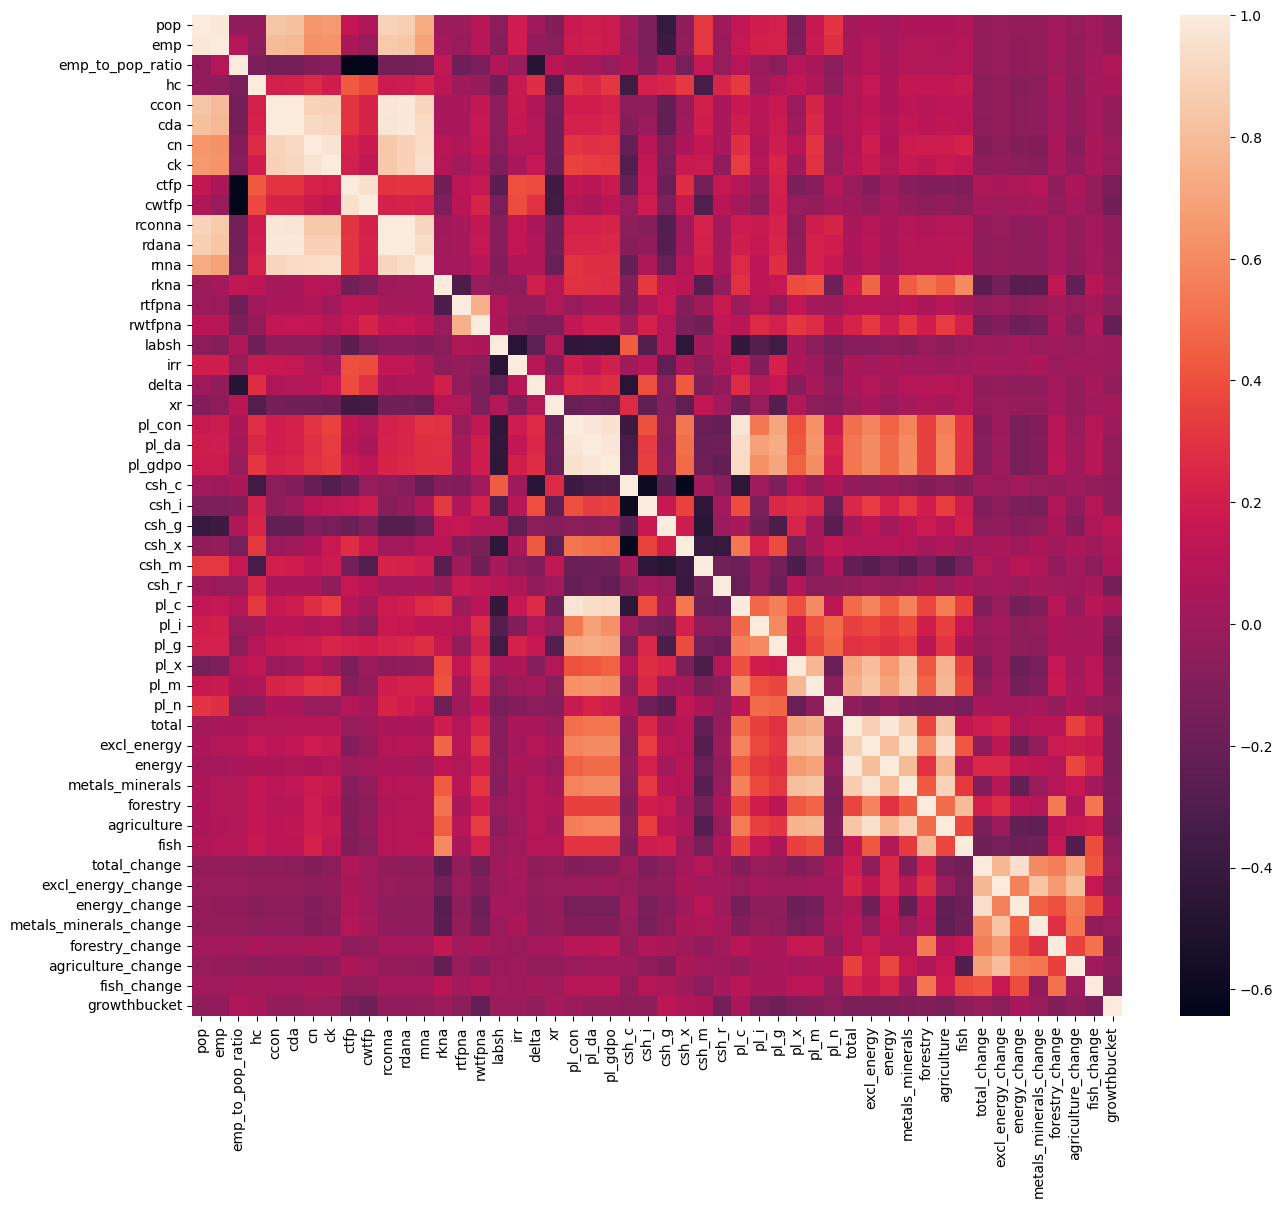

In [5]:
plt.figure(figsize=(15, 13))
sns.heatmap(data=data.corr())

## Model

### Feature Selection

In [6]:
from xgboost import XGBClassifier
from eli5.sklearn import PermutationImportance


X = data.drop(columns=['growthbucket'])
y = data.growthbucket

model = XGBClassifier(n_estimators=500, learning_rate=0.001, random_state=0)
model.fit(X, y)
permi = PermutationImportance(model, random_state=0).fit(X, y)
eli5.show_weights(permi, feature_names=X.columns.tolist(), top=100)

Weight,Feature
0.0403 ± 0.0118,rwtfpna
0.0333 ± 0.0048,delta
0.0156 ± 0.0112,pl_g
0.0095 ± 0.0118,ck
0.0049 ± 0.0049,csh_x
0.0045 ± 0.0048,pop
0.0021 ± 0.0026,pl_x
0.0008 ± 0.0020,rkna
0.0008 ± 0.0020,hc
0 ± 0.0000,pl_con


In [7]:
important_columns = [
    'rwtfpna',
    'delta',
    'pl_g',
    'ck',
    'csh_x',
    'pop',
    'pl_x',
    'rkna',
    'hc'
]
important_columns += ['growthbucket']

important_data = data[important_columns]

In [8]:
from sklearn.model_selection import train_test_split

X = important_data.drop(columns=['growthbucket'])
y = important_data.growthbucket

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = XGBClassifier(n_estimators=500, learning_rate=0.001, random_state=0)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

## Performance

In [9]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
y_test.name = 'expected'
results = pd.concat([y_test, pd.Series(y_pred, index=y_test.index, name='got')], axis=1)

recessed = results[results.expected == 1]
non_recessed = results[results.expected == 0]
acc_rec = accuracy_score(recessed.expected, recessed.got)
acc_nrec = accuracy_score(non_recessed.expected, non_recessed.got)

print(f"Recessed classification accuracy: {acc_rec}")
print(f"None-recessed classification accuracy: {acc_nrec}")

Recessed classification accuracy: 0.0
None-recessed classification accuracy: 0.9767441860465116
